In [75]:
import os
import re
import matplotlib.pyplot as plt

In [76]:
# Funzione per leggere il file e estrarre i dati
def read_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        content = file.read()
        
    # Usando una regular expression per estrarre i dati
    pattern = r"data_instance.id: (\d+)\s+node_features \(post-forward\):\s+tensor\(\[\[([0-9.]+), ([0-9.]+)\]\], dtype=torch.float64\)\s+Prediction: (\d)"
    matches = re.findall(pattern, content)
    
    for match in matches:
        instance_id = int(match[0])
        x = float(match[1])
        y = float(match[2])
        prediction = int(match[3])
        data.append((instance_id, x, y, prediction))
    
    return data

# Funzione per plottare i dati
def plot_data(data):
    # Separiamo i dati in due gruppi per le previsioni 0 e 1
    x_0 = [d[1] for d in data if d[3] == 0]
    y_0 = [d[2] for d in data if d[3] == 0]
    x_1 = [d[1] for d in data if d[3] == 1]
    y_1 = [d[2] for d in data if d[3] == 1]
    # ids_0 = [d[0] for d in data if d[3] == 0]
    # ids_1 = [d[0] for d in data if d[3] == 1]
    
    # Annotiamo prima i punti (in modo che il testo venga visualizzato dietro i punti)
    # for i, txt in enumerate(ids_0):
    #     plt.annotate(txt, (x_0[i], y_0[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')
    # for i, txt in enumerate(ids_1):
    #     plt.annotate(txt, (x_1[i], y_1[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')

    # Ora tracciamo i punti (i punti saranno in primo piano)
    plt.scatter(x_0, y_0, color='blue', label='Class 0', alpha=0.1)
    plt.scatter(x_1, y_1, color='red', label='Class 1', alpha=0.1)
    
    plt.xlabel(r'$x_0$')
    plt.ylabel(r'$x_1$')
    plt.legend()
    plt.grid(True)

In [81]:
# Ricava il nome del file più recente
file_name = max(os.listdir("..\\..\\explainability\GRETEL-repo\\output\\embeddings\\"), key=lambda f: os.path.getmtime(os.path.join("..\\..\\explainability\GRETEL-repo\\output\\embeddings\\", f)))
file_name = file_name.split('.')[0]

file_name = "7652-Martina"

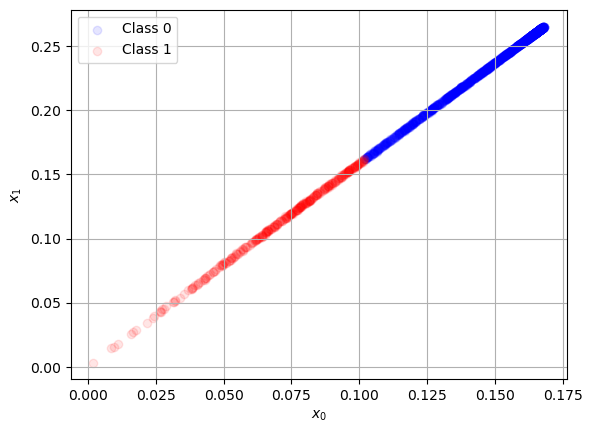

In [82]:
data = read_data("..\\..\\explainability\GRETEL-repo\\output\\embeddings\\" + file_name + ".txt")
plot_data(data)

plt.savefig("..\\..\\explainability\GRETEL-repo\\output\\embeddings\\" + file_name + ".png")
plt.show()